In [1]:
import pandas as pd
import numpy as np
import glob

# EDA img
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn
%matplotlib inline

home_dir = '/home/zehai/2018NBA_Hackathon_Files/Business Analytics/'
file_list = glob.glob(home_dir+'*.csv')
print ([x.split('/')[-1].strip('.csv') for x in file_list])

['game_data', 'team_market', 'training_set', 'team_market_value', 'test_set', 'player_data']


In [2]:
test_df = pd.read_csv(home_dir+'test_set.csv',parse_dates=["Game_Date"])
player_data = pd.read_csv(home_dir+'player_data.csv',parse_dates=["Game_Date"])
game_data = pd.read_csv(home_dir+'game_data.csv',parse_dates=["Game_Date"])
train_df = pd.read_csv(home_dir+'training_set.csv',parse_dates=["Game_Date"])

In [3]:
# Sum viewers of all countries based on Game_ID
train_df = train_df.groupby(['Season','Game_ID','Game_Date','Away_Team','Home_Team'])['Rounded Viewers'].sum().reset_index()
train_df.rename(index=str, columns={"Rounded Viewers":"Total_Viewers"},inplace = True)
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600001,2016-10-25,NYK,CLE,57691
1,2016-17,21600002,2016-10-25,UTA,POR,40740
2,2016-17,21600003,2016-10-25,SAS,GSW,60428
3,2016-17,21600004,2016-10-26,MIA,ORL,22756
4,2016-17,21600005,2016-10-26,DAL,IND,33922


In [4]:
test_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600010,2016-10-26,DEN,NOP,NaN
1,2016-17,21600023,2016-10-28,HOU,DAL,NaN
2,2016-17,21600027,2016-10-29,BOS,CHA,NaN
3,2016-17,21600026,2016-10-29,ATL,PHI,NaN
4,2016-17,21600048,2016-11-01,LAL,IND,NaN


### Game information

#### Game data contains info:
  1. final score,  
  
  2. score difference at different period, 
  
  3. maximum score difference, 
 
  4. wins and losses till current game
  
### There are 920 missing values in the score

In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 16 columns):
Season                4920 non-null object
Game_ID               4920 non-null int64
Game_Date             4920 non-null datetime64[ns]
Team                  4920 non-null object
Location              4920 non-null object
Wins_Entering_Gm      4920 non-null int64
Losses_Entering_Gm    4920 non-null int64
Team_Minutes          4000 non-null float64
Final_Score           4000 non-null float64
Lead_Changes          4000 non-null float64
Ties                  4000 non-null float64
Largest_Lead          4000 non-null float64
Full_Timeouts         4000 non-null float64
Short_Timeouts        4000 non-null float64
Qtr_4_Score           4000 non-null float64
L2M_Score             4000 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 615.1+ KB


In [6]:
def loss_rate(row):
    if (row.Losses_Entering_Gm ==0) or (row.Wins_Entering_Gm+row.Losses_Entering_Gm)<5:
        return 0
    else:
        return row.Losses_Entering_Gm/(row.Wins_Entering_Gm+row.Losses_Entering_Gm)

game_data['loss_rate'] = game_data.apply(loss_rate, axis = 1)

In [7]:
game_data.head()

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score,loss_rate
0,2016-17,21600001,2016-10-25,CLE,H,0,0,240.0,117.0,1.0,3.0,32.0,4.0,1.0,82.0,113.0,0.0
1,2016-17,21600001,2016-10-25,NYK,A,0,0,240.0,88.0,0.0,1.0,4.0,4.0,2.0,64.0,84.0,0.0
2,2016-17,21600002,2016-10-25,POR,H,0,0,240.0,113.0,6.0,6.0,13.0,5.0,0.0,77.0,104.0,0.0
3,2016-17,21600002,2016-10-25,UTA,A,0,0,240.0,104.0,5.0,1.0,8.0,5.0,2.0,83.0,102.0,0.0
4,2016-17,21600003,2016-10-25,GSW,H,0,0,240.0,100.0,1.0,2.0,4.0,3.0,1.0,77.0,100.0,0.0


In [8]:
l = game_data.groupby('Game_ID')['loss_rate'].sum()

### Rate with less loss_rate tend to have higher viewer rate

In [9]:
eda_df = pd.merge(train_df,l.to_frame().reset_index(),on='Game_ID')
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,0.0


Text(0,0.5,'Frequency')

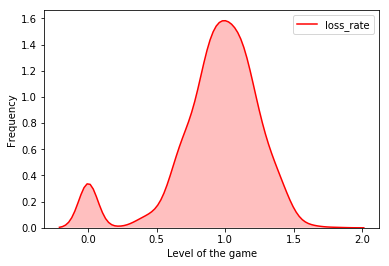

In [10]:
g = sns.kdeplot(eda_df["loss_rate"], color="Red", shade = True)
g.set_xlabel("Level of the game")
g.set_ylabel("Frequency")

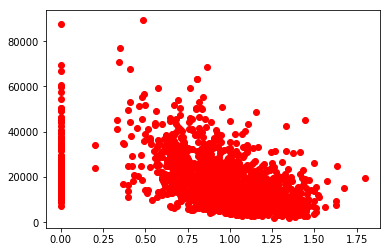

In [11]:
plt.plot(eda_df["loss_rate"],eda_df["Total_Viewers"],'ro')

### Loss rate can evaluate quality of the team
mean_value gives the overall status of the season

In [12]:
team_name_map = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/name_map.txt',sep='\t')
team_name_map

,Short,Team
0,ATL,Atlanta Hawks
1,BKN,Brooklyn Nets
2,BOS,Boston Celtics
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [13]:
team_rating_2015 = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/2015_team_rating.txt')
team_rating_2016 = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/2016_team_rating.txt')
team_rating_2017 = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/2017_team_rating.txt')
team_rating_2016.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Golden State Warriors,W,P,67,15,0.817,11.63,116.26,104.57,11.69,11.35,116.02,104.61,11.41
1,2,San Antonio Spurs,W,SW,61,21,0.744,7.20,111.81,104.25,7.56,7.13,111.62,104.12,7.49
2,3,Houston Rockets,W,SW,55,27,0.671,5.77,115.59,109.96,5.63,5.84,115.70,109.98,5.72
3,4,Los Angeles Clippers,W,P,51,31,0.622,4.29,113.38,108.88,4.50,4.42,113.46,108.82,4.64
4,5,Utah Jazz,W,NW,51,31,0.622,3.94,110.46,106.19,4.27,4.00,110.31,105.98,4.33


In [14]:
team_rating_2015= pd.merge(team_rating_2015,team_name_map,on='Team')[['Rk','Short','Div','W/L%','NRtg/A']].rename(index=str, columns={'Short':'Team'})

In [15]:
def hist_loss(row):
    return np.log((row.Rk+5)/5)/(row['W/L%']+1)/1.7

team_rating_2015['derived_loss_rate'] = team_rating_2015.apply(hist_loss, axis=1)

In [16]:
team_rate_2015 = dict(zip(team_rating_2015['Team'],team_rating_2015['derived_loss_rate']))
team_rate_2015

{'SAS': 0.059024752110445326,
 'GSW': 0.10472214024936598,
 'OKC': 0.1654534548687773,
 'CLE': 0.20398634908975158,
 'TOR': 0.242265974820854,
 'LAC': 0.2817730542363914,
 'ATL': 0.32490953325437,
 'BOS': 0.35461549268043663,
 'CHA': 0.38211891526485736,
 'UTA': 0.43430277066259876,
 'IND': 0.44170843041266883,
 'MIA': 0.4541753318322938,
 'POR': 0.49023454608368644,
 'DET': 0.5109269649555437,
 'HOU': 0.5436448474979962,
 'DAL': 0.558311751201884,
 'WAS': 0.5810213885977316,
 'CHI': 0.5937038217767854,
 'ORL': 0.6466119452219158,
 'MEM': 0.6261429786936276,
 'SAC': 0.691725528902988,
 'DEN': 0.7075601886255889,
 'NYK': 0.7290590764879827,
 'NOP': 0.756979552817317,
 'MIN': 0.7784166605387327,
 'MIL': 0.7655237442523478,
 'PHX': 0.8530781205724385,
 'BKN': 0.8837905812253558,
 'LAL': 0.9342183401637805,
 'PHI': 1.020189865290612}

In [17]:
team_rating_2016= pd.merge(team_rating_2016,team_name_map,on='Team')[['Rk','Short','Div','W/L%','NRtg/A']].rename(index=str, columns={'Short':'Team'})
team_rating_2016['derived_loss_rate'] = team_rating_2016.apply(hist_loss, axis=1)
team_rate_2016 = dict(zip(team_rating_2016['Team'],team_rating_2016['derived_loss_rate']))
team_rate_2016

{'GSW': 0.059024752110445326,
 'SAS': 0.11348901666932436,
 'HOU': 0.1654534548687773,
 'LAC': 0.21316699242116455,
 'UTA': 0.2513770873141167,
 'TOR': 0.28594232260980285,
 'CLE': 0.3174979101160151,
 'BOS': 0.341473606256678,
 'WAS': 0.37901031332590673,
 'OKC': 0.41083440734008075,
 'MEM': 0.4489543036149764,
 'MIA': 0.47991193396945714,
 'DEN': 0.5063780223996143,
 'CHA': 0.5457225470025507,
 'CHI': 0.5436448474979962,
 'POR': 0.5627782452114991,
 'MIL': 0.5764101077358449,
 'IND': 0.5937038217767854,
 'MIN': 0.6696046776717517,
 'ATL': 0.6212127190188746,
 'DET': 0.668366086507229,
 'NOP': 0.701059635655884,
 'DAL': 0.7228189132084851,
 'SAC': 0.7439094022650755,
 'NYK': 0.7648593311824704,
 'PHX': 0.8300574550980602,
 'PHI': 0.814272926422611,
 'LAL': 0.8428557099613113,
 'BKN': 0.9064321033582661,
 'ORL': 0.845386284236386}

In [18]:
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,0.0


In [19]:
def fill_zero_loss_rate(row):
    if (row.loss_rate==0.0) & (row.Season=='2016-17'):
        return team_rate_2015[row.Away_Team]+team_rate_2015[row.Home_Team]
    if (row.loss_rate==0.0) & (row.Season=='2017-18'):
        return team_rate_2016[row.Away_Team]+team_rate_2016[row.Home_Team]
    else:
        return row.loss_rate

In [20]:
eda_df['loss_rate']=eda_df.apply(fill_zero_loss_rate,axis=1)

Text(0,0.5,'Frequency')

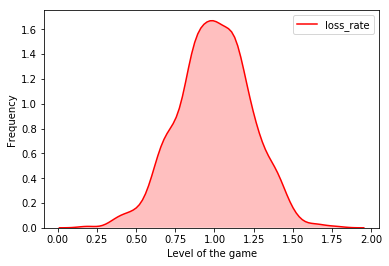

In [21]:
g = sns.kdeplot(eda_df["loss_rate"], color="Red", shade = True)
g.set_xlabel("Level of the game")
g.set_ylabel("Frequency")

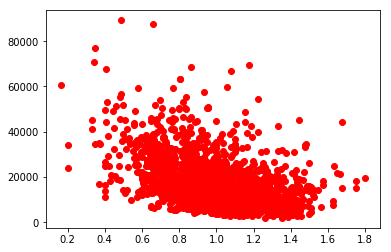

In [22]:
plt.plot(eda_df["loss_rate"],eda_df["Total_Viewers"],'ro')

In [23]:
Team_rate = game_data.groupby(['Season','Team'])['loss_rate'].describe().reset_index().sort_values(by=['Season','mean'])

In [24]:
Team_rate.head()

,Season,Team,count,mean,std,min,25%,50%,75%,max
9,2016-17,GSW,82.0,0.157099,0.052775,0.0,0.142857,0.155364,0.181818,0.333333
26,2016-17,SAS,82.0,0.206690,0.061220,0.0,0.200000,0.217029,0.228446,0.375000
5,2016-17,CLE,82.0,0.248154,0.100015,0.0,0.217731,0.276389,0.318907,0.370370
10,2016-17,HOU,82.0,0.296048,0.091887,0.0,0.272727,0.307072,0.324919,0.500000
12,2016-17,LAC,82.0,0.301570,0.120892,0.0,0.252315,0.354248,0.395655,0.420290


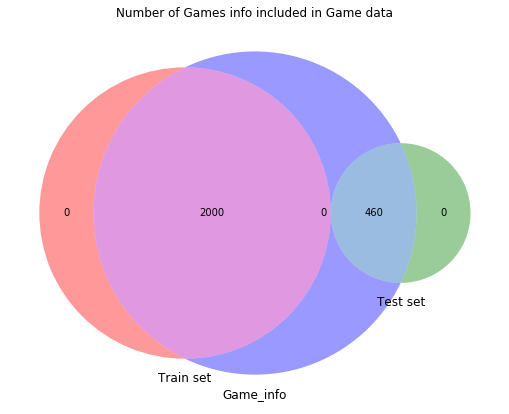

In [25]:
from matplotlib_venn import venn3

plt.figure(figsize=(10,7))
venn3([set(train_df.Game_ID.unique()), set(test_df.Game_ID.unique()),set(game_data.Game_ID.unique())], set_labels = ('Train set', 'Test set','Game_info') )
plt.title("Number of Games info included in Game data", fontsize=12)
plt.show()

## Effect of the Game Date on viewers

In [26]:
full_df = [train_df, test_df]

In [27]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays= cal.holidays()

for df in full_df:
    df['weekday'] = df.Game_Date.dt.weekday
    df['month'] = df.Game_Date.dt.month
    df['holiday']= df.Game_Date.isin(holidays)

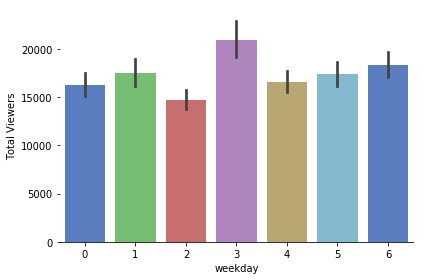

In [28]:
g = sns.factorplot(x="weekday",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

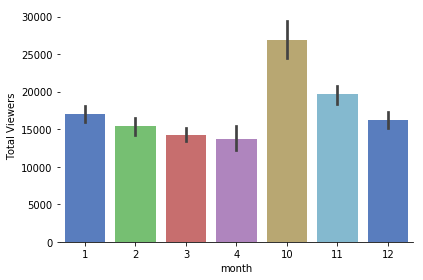

In [29]:
g = sns.factorplot(x="month",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

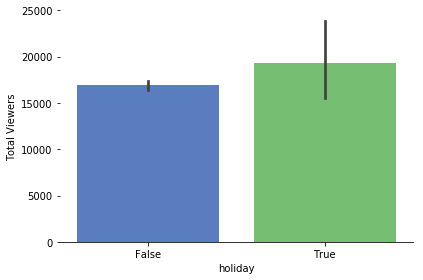

In [30]:
g = sns.factorplot(x="holiday",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

## Effect of super stars

In [31]:
# number ASG player in the Game
player_data['ASG_status'] = (player_data['ASG_Team']!= 'None')
ASG_per_Game = player_data.groupby('Game_ID')['ASG_status'].sum().to_frame().reset_index()

In [32]:
train_df = train_df.merge(ASG_per_Game, on='Game_ID')

In [33]:
for df in full_df:
    df = df.merge(ASG_per_Game, on='Game_ID')

In [34]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0


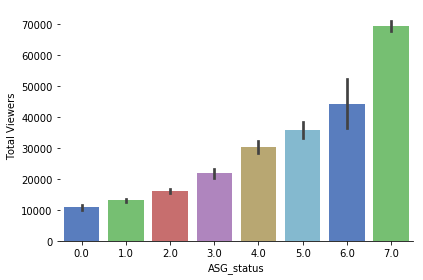

In [35]:
g = sns.factorplot(x="ASG_status",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

### Team effect with good history

In [36]:
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.933045
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.924537
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.163747
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,1.100787
4,2016-17,21600005,2016-10-26,DAL,IND,33922,1.000020


In [37]:
train_df.merge(eda_df[['Game_ID','loss_rate']], on='Game_ID').head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,0.933045
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,0.924537
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,0.163747
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,1.100787
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,1.000020


## Team ranking effect

In [38]:
Team_level = pd.merge(team_rating_2015[['Team','Rk']],team_rating_2016[['Team','Rk']],on='Team')

In [39]:
Team_level['level'] = (Team_level['Rk_x']+Team_level['Rk_y'])//2

In [40]:
Team_level_2016 = Team_level.sort_values(by='level')[['Team','level']]

In [41]:
level_2016 = dict(zip(Team_level_2016['Team'],Team_level_2016['level']))

In [42]:
def calculate_match_level(row):
    return level_2016[row.Home_Team]+level_2016[row.Away_Team]

In [43]:
train_df['Match_level'] = train_df.apply(calculate_match_level, axis=1)

In [44]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,29
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,2
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,36
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,33


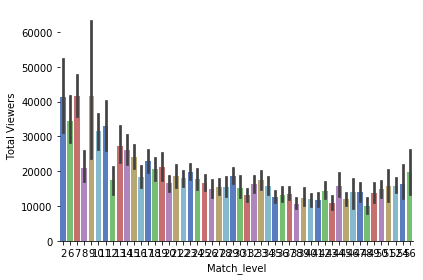

In [45]:
g = sns.factorplot(x="Match_level",y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [46]:
def calculate_team_level(row):
    return min(level_2016[row.Home_Team],level_2016[row.Away_Team])

train_df['Best_team_level'] = train_df.apply(calculate_team_level, axis=1)

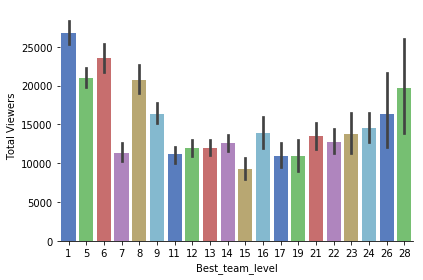

In [47]:
g = sns.factorplot(x='Best_team_level',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [48]:
train_df[train_df['Best_team_level']==28]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level
127,2016-17,21600157,2016-11-15,BKN,LAL,25781,1,11,False,0.0,56,28
460,2016-17,21600560,2017-01-08,PHI,BKN,15482,6,1,False,0.0,56,28
806,2016-17,21600990,2017-03-12,PHI,LAL,16709,6,3,False,0.0,56,28
905,2016-17,21601105,2017-03-28,PHI,BKN,7136,1,3,False,0.0,56,28
945,2016-17,21601154,2017-04-04,BKN,PHI,6193,1,4,False,0.0,56,28
1114,2017-18,21700130,2017-11-03,BKN,LAL,26075,4,11,False,0.0,56,28
1185,2017-18,21700214,2017-11-15,PHI,LAL,39009,2,11,False,1.0,56,28
1311,2017-18,21700363,2017-12-07,LAL,PHI,40089,3,12,False,1.0,56,28
1628,2017-18,21700768,2018-02-02,LAL,BKN,16835,4,2,False,0.0,56,28
1814,2017-18,21700999,2018-03-11,PHI,BKN,9117,6,3,False,1.0,56,28


## lakers have lager viewers population due to history reasons

In [49]:
train_df[train_df['Best_team_level']==7]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21,7
21,2016-17,21600024,2016-10-28,LAL,UTA,25043,4,10,False,1.0,35,7
52,2016-17,21600062,2016-11-02,DAL,UTA,10241,2,11,False,1.0,26,7
72,2016-17,21600087,2016-11-06,UTA,NYK,32867,6,11,False,2.0,31,7
91,2016-17,21600108,2016-11-09,UTA,CHA,9833,2,11,False,2.0,18,7
103,2016-17,21600124,2016-11-11,UTA,ORL,8935,4,11,True,1.0,31,7
111,2016-17,21600136,2016-11-12,UTA,MIA,7971,5,11,False,1.0,19,7
121,2016-17,21600151,2016-11-14,MEM,UTA,12146,0,11,False,2.0,22,7
139,2016-17,21600173,2016-11-17,CHI,UTA,17728,3,11,False,2.0,23,7
148,2016-17,21600184,2016-11-19,UTA,HOU,23656,5,11,False,2.0,16,7


In [50]:
# Another rank https://www.ranker.com/crowdranked-list/favorite-nba-basketball-teams

level = {'ATL': 13,
 'BKN': 28,
 'BOS': 6,
 'CHA': 11,
 'CHI': 3,
 'CLE': 5,
 'DAL': 16,
 'DEN': 17,
 'DET': 17,
 'GSW': 1,
 'HOU': 12,
 'IND': 14,
 'LAC': 11,
 'LAL': 2,
 'MEM': 15,
 'MIA': 7,
 'MIL': 21,
 'MIN': 13,
 'NOP': 23,
 'NYK': 10,
 'OKC': 5,
 'ORL': 24,
 'PHI': 28,
 'PHX': 26,
 'POR': 9,
 'SAC': 22,
 'SAS': 8,
 'TOR': 4,
 'UTA': 17,
 'WAS': 13}

In [51]:
def calculate_team_level(row):
    return min(level[row.Home_Team],level[row.Away_Team])

train_df['Best_team_level'] = train_df.apply(calculate_team_level, axis=1)

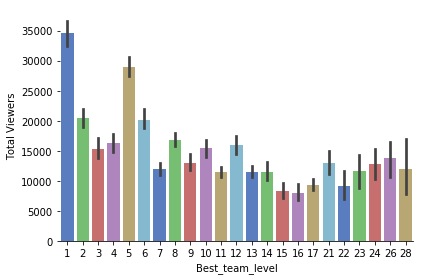

In [52]:
g = sns.factorplot(x='Best_team_level',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [53]:
print ('16-17 Season date included:')
print (train_df['Game_Date'][train_df['Season']=='2016-17'].min(),
       '~',train_df['Game_Date'][train_df['Season']=='2016-17'].max())

16-17 Season date included:
2016-10-25 00:00:00 ~ 2017-04-12 00:00:00


In [54]:
print ('17-18 Season date included:')
print (train_df['Game_Date'][train_df['Season']=='2017-18'].min(),
       '~',train_df['Game_Date'][train_df['Season']=='2017-18'].max())

17-18 Season date included:
2017-10-17 00:00:00 ~ 2018-04-11 00:00:00


In [55]:
eda_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,loss_rate
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,0.933045
1,2016-17,21600002,2016-10-25,UTA,POR,40740,0.924537
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,0.163747
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,1.100787
4,2016-17,21600005,2016-10-26,DAL,IND,33922,1.000020


In [56]:
team_rating_2015

,Rk,Team,Div,W/L%,NRtg/A,derived_loss_rate
0,1,SAS,SW,0.817,11.10,0.059025
1,2,GSW,P,0.890,10.49,0.104722
2,3,OKC,NW,0.671,7.35,0.165453
3,4,CLE,C,0.695,5.90,0.203986
4,5,TOR,A,0.683,4.50,0.242266
5,6,LAC,P,0.646,4.31,0.281773
6,7,ATL,SE,0.585,3.62,0.324910
7,8,BOS,A,0.585,2.81,0.354615
8,9,CHA,SE,0.585,2.34,0.382119
9,10,UTA,NW,0.488,2.09,0.434303


In [57]:
team_marketing = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/2016_team_marketing_size.txt')

In [58]:
team_marketing.head()

,Unnamed: 0,Team,W,L,%,W.1,L.1,Home%,Market Size,Median Tix
0,1,Warriors,62,7,89.86%,32,0,100.00%,7,$362.00
1,2,Spurs,59,10,85.51%,35,0,100.00%,34,$179.00
2,3,Cavaliers,49,20,71.01%,28,6,82.35%,20,$80.00
3,4,Raptors,48,21,69.57%,28,8,77.78%,6,$89.00
4,5,Thunder,48,22,68.57%,27,9,75.00%,45,$202.00


In [59]:
team_name_map['Team'] = team_name_map['Team'].apply(lambda x: x.split(' ')[-1])

In [60]:
team_name_map.Team[24] = 'Trail Blazers'

In [61]:
team_name_map.head()

,Short,Team
0,ATL,Hawks
1,BKN,Nets
2,BOS,Celtics
3,CHA,Hornets
4,CHI,Bulls


In [62]:
team_market_rank = team_name_map[['Team','Short']].merge(team_marketing[['Team','Market Size']].sort_values(by='Market Size'),on ='Team')



In [63]:
team_market_rank = team_market_rank.sort_values(by='Market Size')

In [64]:
team_market_rank.sort_values(by='Market Size')

,Team,Short,Market Size
1,Nets,BKN,1
19,Knicks,NYK,1
13,Lakers,LAL,2
12,Clippers,LAC,2
4,Bulls,CHI,3
22,76ers,PHI,4
6,Mavericks,DAL,5
27,Raptors,TOR,6
9,Warriors,GSW,7
2,Celtics,BOS,8


In [65]:
team_market_rank['Market'] = 53-team_market_rank['Market Size']

In [66]:
team_market_rank[['Short','Market']].rename(index=str, columns={'Short':'Team'})

,Team,Market
1,BKN,52
19,NYK,52
13,LAL,51
12,LAC,51
4,CHI,50
22,PHI,49
6,DAL,48
27,TOR,47
9,GSW,46
2,BOS,45


In [67]:
market_size = team_market_rank[['Short','Market']].rename(index=str, columns={'Short':'Team'}).set_index('Team').to_dict()

In [68]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,29,5
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21,9
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,2,1
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,36,7
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,33,14


In [69]:
def market_cal(row):
    return (market_size['Market'][row.Away_Team]+market_size['Market'][row.Home_Team])

In [70]:
train_df['Game Market'] = train_df.apply(market_cal,axis=1)

In [71]:
train_df.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level,Game Market
0,2016-17,21600001,2016-10-25,NYK,CLE,57691,1,10,False,4.0,29,5,85
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21,9,47
2,2016-17,21600003,2016-10-25,SAS,GSW,60428,1,10,False,5.0,2,1,65
3,2016-17,21600004,2016-10-26,MIA,ORL,22756,2,10,False,0.0,36,7,70
4,2016-17,21600005,2016-10-26,DAL,IND,33922,2,10,False,1.0,33,14,73


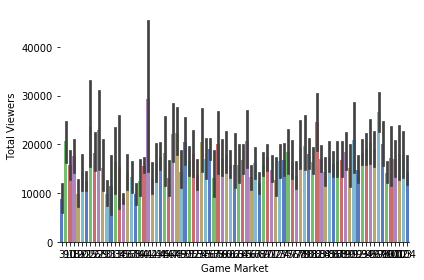

In [72]:
g = sns.factorplot(x='Game Market',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [73]:
market_value = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/Market_value.csv', header=None, names=['Team','Market'])

In [74]:
market_value.head()

,Team,Market
0,New York Knicks,3600
1,Los Angeles Lakers,3300
2,Golden State Warriors,3100
3,Chicago Bulls,2600
4,Boston Celtics,2500


In [75]:
team_name_map = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/external_data/name_map.txt',sep='\t')
team_name_map

,Short,Team
0,ATL,Atlanta Hawks
1,BKN,Brooklyn Nets
2,BOS,Boston Celtics
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls
5,CLE,Cleveland Cavaliers
6,DAL,Dallas Mavericks
7,DEN,Denver Nuggets
8,DET,Detroit Pistons
9,GSW,Golden State Warriors


In [76]:
pd.merge(market_value, team_name_map, on='Team')[['Short','Market']].rename(index=str, columns={'Short':'Team'}).to_csv('/home/zehai/2018NBA_Hackathon_Files/Business Analytics/team_market_value.csv')

In [77]:
team_market_value = pd.read_csv('/home/zehai/2018NBA_Hackathon_Files/Business Analytics/team_market_value.csv')

In [78]:
team_market_value['Market'] = team_market_value['Market']//100

In [79]:
market_value_dict = dict(zip(team_market_value['Team'],team_market_value['Market']))

In [80]:
market_value_dict

{'NYK': 36,
 'LAL': 33,
 'GSW': 31,
 'CHI': 26,
 'BOS': 25,
 'BKN': 23,
 'HOU': 22,
 'LAC': 21,
 'DAL': 19,
 'MIA': 17,
 'SAS': 15,
 'TOR': 14,
 'SAC': 13,
 'WAS': 13,
 'CLE': 13,
 'POR': 13,
 'PHX': 12,
 'OKC': 12,
 'ORL': 12,
 'UTA': 12,
 'PHI': 11,
 'IND': 11,
 'ATL': 11,
 'DEN': 11,
 'DET': 11,
 'MIL': 10,
 'MIN': 10,
 'CHA': 10,
 'MEM': 10,
 'NOP': 10}

In [81]:
def market_cal(row):
    return (market_value_dict[row.Away_Team]+market_value_dict[row.Home_Team])

train_df['Game Market'] = train_df.apply(market_cal,axis=1)

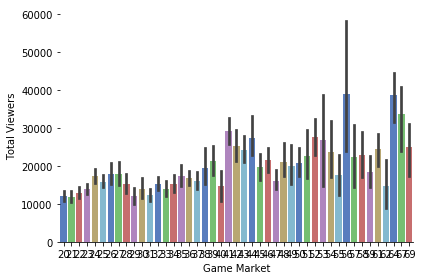

In [82]:
g = sns.factorplot(x='Game Market',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [83]:
player_data[player_data['Points']>20]
print (player_data.columns.tolist())
player_data.quantile(0.80)

['Season', 'Game_ID', 'Game_Date', 'Team', 'Person_ID', 'Name', 'ASG_Team', 'Active_Status', 'Minutes', 'Points', 'Defensive_Rebounds', 'Offensive_Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Field_Goals', 'Field_Goals_Attempted', 'Three_Pointers', 'Three_Pointers_Attempted', 'Free_Throws', 'Free_Throws_Attempted', 'Personal_Fouls', 'ASG_status']


Game_ID                     21700762.0
Person_ID                    1627741.0
Minutes                           30.0
Points                            13.0
Defensive_Rebounds                 4.0
Offensive_Rebounds                 1.0
Assists                            3.0
Steals                             1.0
Blocks                             1.0
Turnovers                          2.0
Field_Goals                        5.0
Field_Goals_Attempted             10.0
Three_Pointers                     1.0
Three_Pointers_Attempted           4.0
Free_Throws                        2.0
Free_Throws_Attempted              3.0
Personal_Fouls                     3.0
ASG_status                         0.0
Name: 0.8, dtype: float64

In [84]:
error_group =[21600981,
 21600447,
 21600543,
 21601106,
 21700018,
 21600814,
 21700183,
 21600786,
 21600969,
 21600934]

In [85]:
train_df[train_df["Game_ID"].isin(error_group)]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level,Game Market
367,2016-17,21600447,2016-12-23,WAS,MIL,4129,4,12,False,2.0,34,13,23
444,2016-17,21600543,2017-01-05,SAS,DEN,6463,3,1,False,1.0,18,8,26
636,2016-17,21600786,2017-02-08,LAL,DET,6975,2,2,False,0.0,45,2,44
658,2016-17,21600814,2017-02-11,ORL,DAL,5340,5,2,False,0.0,43,16,31
756,2016-17,21600934,2017-03-06,MIL,PHI,7353,0,3,False,1.0,49,21,21
785,2016-17,21600969,2017-03-10,TOR,ATL,7662,4,3,False,3.0,18,4,25
797,2016-17,21600981,2017-03-11,ATL,MEM,4349,5,3,False,2.0,28,13,21
906,2016-17,21601106,2017-03-28,PHX,ATL,4099,1,3,False,1.0,39,13,23
1026,2017-18,21700018,2017-10-20,POR,IND,10858,4,10,False,2.0,28,9,24
1163,2017-18,21700183,2017-11-11,CHI,SAS,7517,5,11,False,1.0,17,3,41


In [86]:
def diff_group(X):
    return (X.max()-X.min())

l = game_data.groupby('Game_ID')['L2M_Score'].apply(diff_group).sort_values(ascending=False).to_frame().reset_index()

In [87]:
train_df = train_df.merge(l, on='Game_ID')

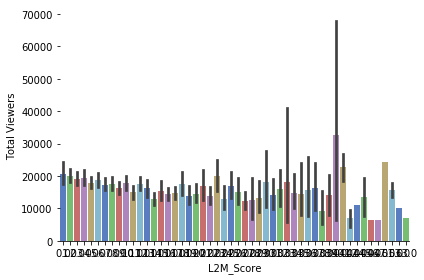

In [88]:
g = sns.factorplot(x='L2M_Score',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [89]:
game_data.describe()

,Game_ID,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score,loss_rate
count,4.920000e+03,4920.000000,4920.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4920.000000
mean,2.165062e+07,20.269309,20.230691,241.562500,105.894250,3.345500,2.60650,12.180500,5.025750,0.606500,79.440000,99.950750,0.469477
std,5.000634e+04,13.678415,13.648129,7.098147,12.196321,2.840888,2.42768,9.094207,1.168729,0.909046,10.376985,11.714484,0.194719
min,2.160000e+07,0.000000,0.000000,240.000000,64.000000,0.000000,0.00000,0.000000,1.000000,0.000000,41.000000,59.000000,0.000000
25%,2.160062e+07,9.000000,9.000000,240.000000,98.000000,1.000000,1.00000,5.000000,4.000000,0.000000,73.000000,92.000000,0.380952
50%,2.165062e+07,19.000000,19.000000,240.000000,106.000000,3.000000,2.00000,10.000000,5.000000,0.000000,79.000000,100.000000,0.480000
75%,2.170062e+07,30.000000,30.000000,240.000000,114.000000,5.000000,4.00000,17.000000,6.000000,1.000000,86.000000,108.000000,0.612903
max,2.170123e+07,66.000000,61.000000,365.000000,149.000000,17.000000,15.00000,65.000000,11.000000,5.000000,120.000000,144.000000,1.000000


In [90]:
game_lead_level = game_data.groupby('Game_ID')['Largest_Lead'].sum().sort_values(ascending=False).to_frame().reset_index()

In [91]:
train_df = train_df.merge(game_lead_level, on='Game_ID')

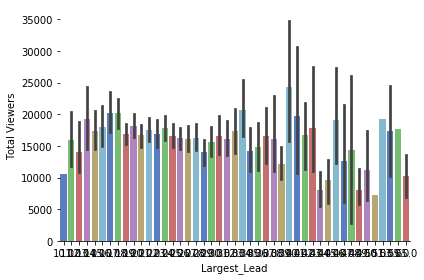

In [92]:
g = sns.factorplot(x='Largest_Lead',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [93]:
train_df[train_df['Game_ID'].isin([21600981,
 21700096,
 21701202,
 21700142,
 21700073,
 21700542,
 21600543,
 21700018,
 21600786,
 21700380])]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level,Game Market,L2M_Score,Largest_Lead
444,2016-17,21600543,2017-01-05,SAS,DEN,6463,3,1,False,1.0,18,8,26,24.0,37.0
636,2016-17,21600786,2017-02-08,LAL,DET,6975,2,2,False,0.0,45,2,44,20.0,35.0
797,2016-17,21600981,2017-03-11,ATL,MEM,4349,5,3,False,2.0,28,13,21,17.0,26.0
1026,2017-18,21700018,2017-10-20,POR,IND,10858,4,10,False,2.0,28,9,24,23.0,25.0
1074,2017-18,21700073,2017-10-27,BKN,NYK,13735,4,10,False,1.0,52,10,59,19.0,33.0
1092,2017-18,21700096,2017-10-30,CHA,MEM,6064,0,10,False,1.0,26,11,20,4.0,19.0
1126,2017-18,21700142,2017-11-05,IND,NYK,13866,6,11,False,2.0,38,10,47,0.0,26.0
1323,2017-18,21700380,2017-12-09,NYK,CHI,10876,5,12,False,1.0,40,3,62,10.0,16.0
1456,2017-18,21700542,2017-12-31,CHA,LAC,4798,6,12,False,1.0,16,11,31,8.0,24.0
1978,2017-18,21701202,2018-04-08,ATL,BOS,10075,6,4,False,2.0,21,6,36,0.0,19.0


In [94]:
train_df[train_df['Game_ID'].isin([21600881,
 21701220,
 21700084,
 21700225,
 21700349,
 21700717,
 21700536,
 21700663,
 21700454,
 21600717])]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level,Game Market,L2M_Score,Largest_Lead
582,2016-17,21600717,2017-01-29,DAL,SAS,18170,6,1,False,1.0,20,8,34,4.0,24.0
713,2016-17,21600881,2017-02-26,CHA,LAC,16621,6,2,False,2.0,16,11,31,1.0,22.0
1084,2017-18,21700084,2017-10-28,DET,LAC,16469,5,10,False,1.0,22,11,32,8.0,21.0
1193,2017-18,21700225,2017-11-17,POR,SAC,9234,4,11,False,1.0,36,9,26,6.0,13.0
1298,2017-18,21700349,2017-12-04,WAS,UTA,6413,0,12,False,2.0,20,13,25,46.0,49.0
1385,2017-18,21700454,2017-12-20,TOR,CHA,10397,2,12,False,3.0,16,4,24,18.0,29.0
1452,2017-18,21700536,2017-12-30,PHI,DEN,16071,5,12,False,1.0,45,17,22,5.0,25.0
1549,2017-18,21700663,2018-01-18,PHI,BOS,28605,3,1,False,3.0,36,6,36,7.0,27.0
1589,2017-18,21700717,2018-01-26,LAL,CHI,18457,4,1,False,0.0,44,2,59,2.0,20.0
1993,2017-18,21701220,2018-04-11,NYK,CLE,19452,2,4,False,3.0,29,5,49,14.0,30.0


In [95]:
game_lead_level = game_data.groupby('Game_ID')['Ties'].sum().sort_values(ascending=False).to_frame().reset_index()

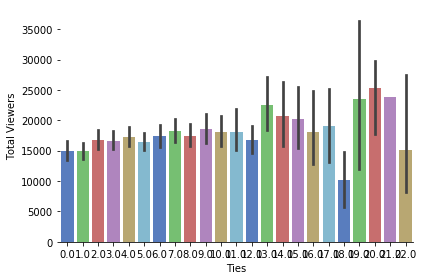

In [96]:
train_df = train_df.merge(game_lead_level, on='Game_ID')
g = sns.factorplot(x='Ties',y="Total_Viewers",data=train_df,kind="bar", size = 4, aspect=1.5,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Total Viewers")

In [97]:
player_data.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls,ASG_status
0,2016-17,21600001,2016-10-25,CLE,101112,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0,False
1,2016-17,21600001,2016-10-25,CLE,201567,Kevin Love,East ASG,Active,25.0,23.0,...,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0,True
2,2016-17,21600001,2016-10-25,CLE,202681,Kyrie Irving,East ASG,Active,30.0,29.0,...,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0,True
3,2016-17,21600001,2016-10-25,CLE,202684,Tristan Thompson,None,Active,22.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,False
4,2016-17,21600001,2016-10-25,CLE,202697,Iman Shumpert,None,Active,14.0,2.0,...,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,False


In [110]:
score_rank = player_data.groupby(['Season','Name'])['Points'].sum().sort_values(ascending=False).reset_index()

In [115]:
Super_star_2016 = score_rank[score_rank['Season']=='2016-17'][:15].Name.tolist()
Super_star_2017 = score_rank[score_rank['Season']=='2017-18'][:15].Name.tolist()

In [119]:
print (Super_star_2016)
print (Super_star_2017)
print (np.intersect1d(Super_star_2016, Super_star_2017))

['Russell Westbrook', 'James Harden', 'DeMar DeRozan', 'Karl-Anthony Towns', 'Anthony Davis', 'Isaiah Thomas', 'Stephen Curry', 'Damian Lillard', 'Andrew Wiggins', 'LeBron James', 'DeMarcus Cousins', 'Kawhi Leonard', 'Kyrie Irving', 'Jimmy Butler', 'Bradley Beal']
['James Harden', 'Anthony Davis', 'Russell Westbrook', 'LeBron James', 'Damian Lillard', 'Bradley Beal', 'Victor Oladipo', 'Paul George', 'DeMar DeRozan', 'Lou Williams', 'Karl-Anthony Towns', 'LaMarcus Aldridge', 'Donovan Mitchell', 'Kevin Durant', 'Giannis Antetokounmpo']
['Anthony Davis' 'Bradley Beal' 'Damian Lillard' 'DeMar DeRozan'
 'James Harden' 'Karl-Anthony Towns' 'LeBron James' 'Russell Westbrook']


In [99]:
player_data.groupby(['Name','Season'])['Points'].sum().sort_values(ascending=False).re

AttributeError: 'Series' object has no attribute 're'

In [103]:
player_data[player_data['Name']=='Gordon Hayward']

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls,ASG_status
45,2016-17,21600002,2016-10-25,UTA,202330,Gordon Hayward,West ASG,Inactive,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
711,2016-17,21600024,2016-10-28,UTA,202330,Gordon Hayward,West ASG,Inactive,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1041,2016-17,21600035,2016-10-30,UTA,202330,Gordon Hayward,West ASG,Inactive,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1587,2016-17,21600053,2016-11-01,UTA,202330,Gordon Hayward,West ASG,Inactive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1848,2016-17,21600062,2016-11-02,UTA,202330,Gordon Hayward,West ASG,Inactive,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2308,2016-17,21600077,2016-11-04,UTA,202330,Gordon Hayward,West ASG,Inactive,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2607,2016-17,21600087,2016-11-06,UTA,202330,Gordon Hayward,West ASG,Active,36.0,28.0,...,0.0,3.0,6.0,17.0,2.0,8.0,14.0,14.0,3.0,True
2781,2016-17,21600093,2016-11-07,UTA,202330,Gordon Hayward,West ASG,Active,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3219,2016-17,21600108,2016-11-09,UTA,202330,Gordon Hayward,West ASG,Active,36.0,29.0,...,1.0,4.0,10.0,19.0,3.0,8.0,6.0,6.0,3.0,True
3719,2016-17,21600124,2016-11-11,UTA,202330,Gordon Hayward,West ASG,Active,39.0,20.0,...,0.0,1.0,6.0,17.0,2.0,8.0,6.0,6.0,1.0,True


In [106]:
train_df[train_df['Game_ID'].isin(player_data[player_data['Name']=='Gordon Hayward'].Game_ID.tolist())]

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,weekday,month,holiday,ASG_status,Match_level,Best_team_level,Game Market,L2M_Score,Largest_Lead,Ties
1,2016-17,21600002,2016-10-25,UTA,POR,40740,1,10,False,1.0,21,9,25,2.0,21.0,7.0
21,2016-17,21600024,2016-10-28,LAL,UTA,25043,4,10,False,1.0,35,2,45,8.0,15.0,12.0
30,2016-17,21600035,2016-10-30,UTA,LAC,28903,6,10,False,2.0,12,11,33,18.0,27.0,3.0
52,2016-17,21600062,2016-11-02,DAL,UTA,10241,2,11,False,1.0,26,16,31,12.0,21.0,2.0
63,2016-17,21600077,2016-11-04,SAS,UTA,18885,4,11,False,2.0,8,8,27,15.0,27.0,2.0
72,2016-17,21600087,2016-11-06,UTA,NYK,32867,6,11,False,2.0,31,10,48,9.0,22.0,5.0
91,2016-17,21600108,2016-11-09,UTA,CHA,9833,2,11,False,2.0,18,11,22,9.0,20.0,8.0
103,2016-17,21600124,2016-11-11,UTA,ORL,8935,4,11,True,1.0,31,17,24,10.0,20.0,6.0
111,2016-17,21600136,2016-11-12,UTA,MIA,7971,5,11,False,1.0,19,7,29,18.0,23.0,4.0
121,2016-17,21600151,2016-11-14,MEM,UTA,12146,0,11,False,2.0,22,15,22,2.0,15.0,9.0
